# Hypothesis Testing (in a nutshell)
![](https://www.coverdale.at/wp-content/uploads/2020/06/25_Agility-in-the-nutshell.jpg)

## What?
- We perform hypothesis testing to see if there's statistical evidence that suggests a relationship between variables exists. 
- The null hypothesis is that there is no difference between groups, no relationship, or no dependence between variables.
- We use our hypothesis tests to disprove the null hypothesis (in order to show that there *is* a relationship.
- We can never actually accept the null hypothesis, but rather only *fail* to reject the null.

## So What?
- **Hypothesis tests allow us to answer business questions through statistical questions/answers.**
- If we reject our null hypothesis, it means that there's something interesting going on between our variables.
- Rejecting the null hypothesis means there's a relationship and it's worth exploring more deeply.
- Rejecting the null hypothesis means that variable A might be a good predictor of variable B.

## Now What?
- Prepare to test
    1. Identify the 2 variables we want to test for a relationship
    2. Determine the variable types and choose the approrpriate test type.
        - Do we have two contiuous variables? (correlation test)
        - Do we have one continuous and one categorical (t-test)
        - Do we have two categorical variables (chi-squared)
        - Do we have one continuous and multiple categorical (ANOVA)
    3. Define and document the null hypothesis and the alternative hypothesis. Write them down before running any test.
- Perform our test
    1. Define our **confidence interval**. How sure do we want/need to be that the results aren't from chance/randomness?
        - Our `alpha` is `1 - confidence interval`. So if we want to be 99% sure our findings are not explained by randomness, then our `alpha` would be `0.01`
    2. Run the test to get the `p` value.
        - `from scipy import stats`
        - Select the right test then run it to get our `p` value.
    3. If `p < alpha` then we reject the null hypothesis. Otherwise we fail to reject the null hypothesis, which means "We failed to prove the effect/relationship" in English.
   
![hypothesis testing diagram](./img/hypothesis_testing_types.png)

In [1]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = data("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## Example Business Questions
> Hypothesis testing allows us to answer business questions with statistical tests.

- Does the tip amount vary w/ the size of the total bill? (I hope so, but let's answer w/ a statistical test) **correlation test**
- Do smoking tables tip better than non-smoking tables? **t-test**
- Do smoking tables have higher total_bills than non-smoking bills? **t-test**
- Is there a relationship between smoking tables and time of day?
- Is there a relationship between smoking tables and day of week?

## Testing Continuous to Continuous (Regression)

![continuous vs. continuous variable test w/ regression](./img/continuous_vs_continuous.png)

- Business question is, "Do tips increase as total_bill increases" or "Do bigger bills mean bigger tips?"
- Statistical wording for the question: Do tips and total bill have a linear relationship?
- We'll get the answer with a correlation test!
- For correlation, our null hypothesis is that there is no linear relationship.

#### Gotchas w/ Correlation Test
- Correlation ain't causation
- Correlation measures a linear relationship between two variables
- Correlation doesn't account for the presence of confounding variables (other explanatory variables)

In [3]:
null_hypothesis = "Total Bill and Tip amount do not have a linear relationship"
alternative_hypothesis = "Total bill and tip have a linear relationship"

# We want to be 99% sure that our findings are not due to randomness/chance
confidence_interval = 0.99

# We need to define our alpha before we run any tests
alpha = 1 - confidence_interval

In [4]:
from scipy import stats

corr, p = stats.pearsonr(df.total_bill, df.tip)
corr, p

(0.6757341092113647, 6.6924706468630016e-34)

In [5]:
# If our p is lower than our alpha, then we reject the null
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("we are unable (currently) to prove there's no linear relationship")

We reject the null hypothesis that Total Bill and Tip amount do not have a linear relationship
We move forward with the understanding that Total bill and tip have a linear relationship


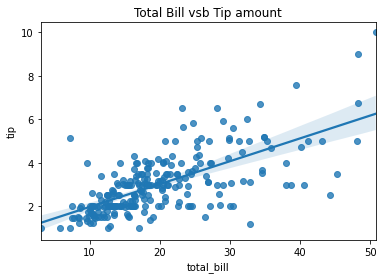

In [6]:
plt.title("Total Bill vsb Tip amount")
sns.regplot(x="total_bill", y="tip", data=df)
plt.show()

#### Takeaways from 
- We reject the null hypothesis that there's no linear relationship between total_bill and tip
- We move forwaard w/ the understanding that total_bill and tip have a linear relationship
- The strength of that relationship isn't 100% 1 to 1, but it's 0.67 (which is pretty decent with real world data)

## Testing A Continuous vs. a categorical (T-Test)
![t-test](img/continuous_vs_categorical.png)
There are 2 approaches to T-Tests
1. One sample T-Test compares the means of a continuous variable between a subgroup vs. the population mean
2. The two sample T-Test compares the means a continuous variable between two different subgroups of a population

### One Sample T-Test Example (compare a subgroup to the population)
- Business question: are tips on Sunday higher vs. the rest of the week?
- The null hypothesis is there's no difference
- The alternative hypothesis is there is a difference between Friday tips vs. tips the rest of the week.

In [7]:
# We want to be sure that the effect we see isn't explained by chance, so we'll keep our alpha super low
null_hypothesis = "Friday tips are the same as the rest of the week."
alternative_hypothesis = "Friday tips are different than the rest of the week" 
alpha = 0.01

In [8]:
# We'll isolate our one subgroup to compare its mean vs. the population
sunday = df[df.day == "Fri"]

In [9]:
t, p = stats.ttest_1samp(sunday.tip, df.tip.mean())
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = -1.127
p = 0.275


In [10]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null")
    print("Our evidence does not support the claim that Friday tips are different than the rest of the week")

We fail to reject the null
Our evidence does not support the claim that Friday tips are different than the rest of the week


### Two Sample T-Test Example (compare two subgroups with eachother)
- Business question: Do smoking tables tip more or less than non-smoking tables
- Statistical question: Are the average tip values dramatically different for each group?

In [11]:
null_hypothesis = "Smoking tables and non-smoking tables tip the same amount"
alternative_hypothesis = "Smoking tables and non-smoking tables tip a different amount"
alpha = 0.01 # we want to be 99% sure our results aren't the result of chance/randomness

In [12]:
smoking = df[df.smoker == "Yes"]
non_smoking = df[df.smoker == "No"]

t, p = stats.ttest_ind(smoking.tip, non_smoking.tip)
p

0.9265931522244976

In [13]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that smoking vs. non-smoking talbes tip differently")

We fail to reject the null hypothesis
Evidence does not support the claim that smoking vs. non-smoking talbes tip differently


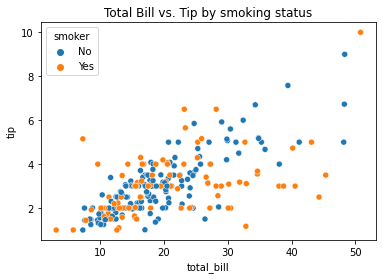

In [14]:
import seaborn as sns
plt.title("Total Bill vs. Tip by smoking status")
sns.scatterplot(x="total_bill", y="tip", data=df, hue="smoker")
plt.show()

## Testing Categorical vs. Categorical (Chi Squared)
![chi_squared](./img/categorical_vs_categorical.png)
- The null hypothesis is that Categorical variable A and Categorical variable B have no relationship, no dependence.
- Business question: a patron wants to visit at lunch or dinner to avoid as many smokers as possible?
- Statistics way of phrasing the question: is there dependence between time of day and smoking status?
- Null hypothesis = there is no dependence between smoking status and time of day

In [15]:
null_hypothesis = "There is no dependence between smoking status and time of day (Lunch or Dinner)"
alternative_hypothesis = "There is a dependence between time of day (lunch/dinner) and smoking status"
alpha = 0.01 # we want to be 99% sure that the evidence we see is not due to chance

In [16]:
observed = pd.crosstab(df.time, df.smoker)

In [17]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.4771485672079724

In [18]:
if p < alpha:
    print("We reject the null that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null")
    print("Evidence does not support the claim that smoking status and time of day are dependent/related")

We fail to reject the null
Evidence does not support the claim that smoking status and time of day are dependent/related


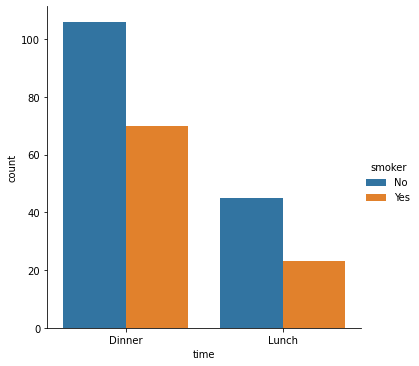

In [19]:
sns.catplot(x="time", hue="smoker", kind="count", data=df)

In [20]:
print(df[df.time == "Dinner"].smoker.value_counts())
print("The ratio of smokers to non-smokers at Dinner is", 70/176)

No     106
Yes     70
Name: smoker, dtype: int64
The ratio of smokers to non-smokers at Dinner is 0.3977272727272727


In [21]:
print(df[df.time == "Lunch"].smoker.value_counts()) # so 23 / (23 + 45)
print("The ratio of smokers to non-smokers at Dinner is", 23 / (23 + 45))

No     45
Yes    23
Name: smoker, dtype: int64
The ratio of smokers to non-smokers at Dinner is 0.3382352941176471


### Takeaways from this Chi-Squared Test (So far) 
- The difference between 34% and 40% is not huge (at least as far as ratios)
- There's less smoke overall at lunch, but the ratios between lunch/dinner aren't far enough apart to be significant
- Looks like between 34%-40% of the restaurant is smoking no matter the time of day...

## Let's run another Chi-Squared test to see how to accomodate our non-smokers
- The patron says "Ok, dinner or lunch doesn't matter as much, but is there a day of the week that's better for non-smokers? I heard your food is good, but I want to be able to smell the cooking!"
- Business question: Are there days that are better for a non-smoker to visit?
- Stats phrasing: Is smoking status of tables independent from the day of the week?
- Our null hypothesis is that there is no dependence. Smoking tables is independent from day of the week
- Alternative hypothesis is that the day of week and smoking status are related/dependent on eachother.

In [22]:
# Let's check if smoking status is independent of which day of the week
null_hypothesis = "Smoking status and day of the week are independent. There's no dependence/relationship"
alternative_hypothesis = "Smoking status and day of the week are dependent"

In [23]:
observed = pd.crosstab(df.day, df.smoker)

In [24]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.0567572499836523e-05

In [25]:
if p < alpha:
    print("We reject the null that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null")
    print("Evidence does not support the claim that smoking status and the day of week are dependent/related")

We reject the null that Smoking status and day of the week are independent. There's no dependence/relationship
We move forward with the alternative hypothesis that Smoking status and day of the week are dependent


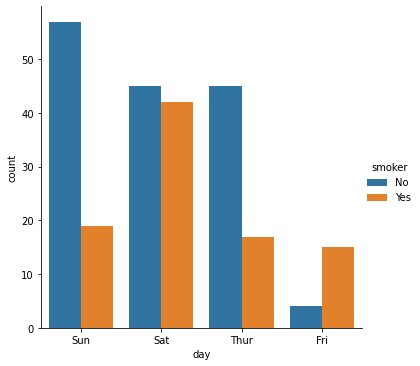

In [26]:
sns.catplot(x="day", hue="smoker", kind="count", data=df)

### More takeaways from the second Chi-Squared test
- It looks like day of the week/smoking status are related/dependent on eachother
- Sunday and Thursday look like great days for patrons who want much less smoking in their restaurant experience
- Friday appears to be the tobacco lobbyist day to visit this restaurant!

## What About Comparing A Continuous Variable to More than 2 Categorical Values? (ANOVA)
![analysis of variance logo](./img/anova.png)
- ANOVA is like a t-test for comparing one continuous variable among 2+ categorical values
- Business use case: Are tips the same or different across days of the week?
- Another business question: Is the `total_bill` 
- Statistical way of framing the question: Are the tip averages significantly different on different days of the week?
- Null hypothesis: tip amounts are the same for each day of the week.
- Alternative hypothsis: tip amounts are different on each day of the week.

In [27]:
null_hypothesis = "Average Tip amounts are the same across days of the week"
alternative_hypothesis = "Average tips are different on different days of the week"
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [28]:
# Let's isolate out the tips by day
thursday_tips = df[df.day == "Thur"].tip
friday_tips = df[df.day == "Fri"].tip
saturday_tips = df[df.day == "Sat"].tip
sunday_tips = df[df.day == "Sun"].tip

In [29]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(thursday_tips, friday_tips, saturday_tips, sunday_tips)
p

0.1735885553040592

In [30]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that tip averages are significantly different across days of the week.")

We fail to reject the null hypothesis
Evidence does not support the claim that tip averages are significantly different across days of the week.


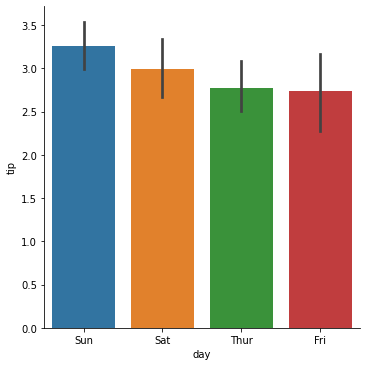

In [31]:
sns.catplot(x="day", y="tip", kind="bar", data=df)

## Takeaways
- Visualizations are a great place to start for exploring relationships of variables
- Statistical tests inform us if we should believe our eyes w/ what we see
- Statistical tests allow us to answer if there's a relationship or not (but don't explain the size of that relationship)
- The $H_0$ null hypothesis is always framed as:
    - There's no significant difference between continuous variables of 2 subgroups (two-sample t-test)
    - There's no significant difference between the continuous variaable of a subgroup and its population (one sample t-test)
    - There's no linear relationship between two continuous variables (correlation)
    - There's no dependence between two categorical variables (chi-squared)

- If the $p$ is low, reject the null
- When we reject the null hypothesis, it means there's *something going on* and it's worth investigating
- If we fail to reject the null hypothesis, it means there's no significant evidence of differences or *something* going on

By [Ryan Orsinger](https://github.com/ryanorsinger)